In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("./US_Accidents_Dec21_updated.csv")
data_df=data_df.dropna()

In [2]:
weatherandseverity = pd.DataFrame(data_df)
print(weatherandseverity.info())
print(weatherandseverity.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     943318 non-null  object 
 1   Severity               943318 non-null  int64  
 2   Start_Time             943318 non-null  object 
 3   End_Time               943318 non-null  object 
 4   Start_Lat              943318 non-null  float64
 5   Start_Lng              943318 non-null  float64
 6   End_Lat                943318 non-null  float64
 7   End_Lng                943318 non-null  float64
 8   Distance(mi)           943318 non-null  float64
 9   Description            943318 non-null  object 
 10  Number                 943318 non-null  float64
 11  Street                 943318 non-null  object 
 12  Side                   943318 non-null  object 
 13  City                   943318 non-null  object 
 14  County                 943318 non-

In [3]:
weatherandseverity["Weather_Condition"].value_counts().head(99)

Fair                              466076
Cloudy                            139944
Mostly Cloudy                     123642
Partly Cloudy                      85090
Light Rain                         39389
                                   ...  
Thunderstorms and Rain                 1
Thunder and Hail                       1
Sand / Dust Whirlwinds / Windy         1
Heavy Sleet                            1
Hail                                   1
Name: Weather_Condition, Length: 91, dtype: int64

In [4]:
weather_c = list(weatherandseverity["Weather_Condition"].value_counts().index[:])
weather_c

['Fair',
 'Cloudy',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Light Rain',
 'Fog',
 'Haze',
 'Light Snow',
 'Rain',
 'Fair / Windy',
 'Thunder in the Vicinity',
 'Thunder',
 'Smoke',
 'Cloudy / Windy',
 'Heavy Rain',
 'T-Storm',
 'Mostly Cloudy / Windy',
 'Light Rain with Thunder',
 'Light Drizzle',
 'Heavy T-Storm',
 'Partly Cloudy / Windy',
 'Light Rain / Windy',
 'Snow',
 'Wintry Mix',
 'Overcast',
 'Light Snow / Windy',
 'Drizzle',
 'Heavy Snow',
 'Rain / Windy',
 'Patches of Fog',
 'Shallow Fog',
 'N/A Precipitation',
 'Mist',
 'Haze / Windy',
 'Heavy Rain / Windy',
 'Heavy T-Storm / Windy',
 'Light Freezing Rain',
 'Snow / Windy',
 'Thunder / Windy',
 'T-Storm / Windy',
 'Showers in the Vicinity',
 'Fog / Windy',
 'Light Freezing Drizzle',
 'Clear',
 'Heavy Snow / Windy',
 'Light Drizzle / Windy',
 'Drizzle and Fog',
 'Heavy Drizzle',
 'Light Rain Shower',
 'Blowing Dust / Windy',
 'Blowing Dust',
 'Scattered Clouds',
 'Smoke / Windy',
 'Light Snow and Sleet',
 'Blowing Snow',
 'Wint

In [5]:
weatherandseverity[weatherandseverity["Weather_Condition"]== "Fair"]["Severity"].value_counts()

2    442745
4     12783
1      5548
3      5000
Name: Severity, dtype: int64

In [6]:
new_list = []
for i in weather_c:
    new_list.append(weatherandseverity[weatherandseverity["Weather_Condition"]== i ]["Severity"].value_counts(sort=False))

In [7]:
df = pd.DataFrame(new_list,index=weather_c)

In [8]:
df

,1,2,3,4
Fair,5548.0,442745.0,5000.0,12783.0
Cloudy,1209.0,131142.0,2455.0,5138.0
Mostly Cloudy,1901.0,116152.0,2301.0,3288.0
Partly Cloudy,1082.0,80207.0,1371.0,2430.0
Light Rain,425.0,36432.0,932.0,1600.0
...,...,...,...,...
Thunderstorms and Rain,NaN,NaN,1.0,NaN
Thunder and Hail,NaN,1.0,NaN,NaN
Sand / Dust Whirlwinds / Windy,NaN,1.0,NaN,NaN
Heavy Sleet,NaN,1.0,NaN,NaN


In [9]:
df.fillna(0,inplace=True)

In [10]:
total = []
for i in df.index:
    n = 0
    n = df.loc[i][1]+df.loc[i][2]+df.loc[i][3]+df.loc[i][4]
    total.append(n)

df["Total"] = total
df

,1,2,3,4,Total
Fair,5548.0,442745.0,5000.0,12783.0,466076.0
Cloudy,1209.0,131142.0,2455.0,5138.0,139944.0
Mostly Cloudy,1901.0,116152.0,2301.0,3288.0,123642.0
Partly Cloudy,1082.0,80207.0,1371.0,2430.0,85090.0
Light Rain,425.0,36432.0,932.0,1600.0,39389.0
...,...,...,...,...,...
Thunderstorms and Rain,0.0,0.0,1.0,0.0,1.0
Thunder and Hail,0.0,1.0,0.0,0.0,1.0
Sand / Dust Whirlwinds / Windy,0.0,1.0,0.0,0.0,1.0
Heavy Sleet,0.0,1.0,0.0,0.0,1.0


In [11]:
p = []
num = df[df["Total"]>1000].shape[0]
for i in df[df["Total"]>1000].index[:num]:
    n1 = (df.loc[i][1]+df.loc[i][2])/df.loc[i]["Total"]
    n2 = (df.loc[i][3]+df.loc[i][4])/df.loc[i]["Total"]
    p.append([round(n1,4),round(n2,4)])

df_graph = pd.DataFrame(p,index=weather_c[:num],columns=['Light','Heavy'])

In [12]:
df_graph.sort_values("Heavy",ascending=False)

,Light,Heavy
Overcast,0.5746,0.4254
Snow,0.8829,0.1171
Light Snow,0.8836,0.1164
Light Drizzle,0.9095,0.0905
Light Rain / Windy,0.9135,0.0865
Partly Cloudy / Windy,0.9201,0.0799
Cloudy / Windy,0.9215,0.0785
Mostly Cloudy / Windy,0.9266,0.0734
Wintry Mix,0.9295,0.0705
Fair / Windy,0.9315,0.0685


In [13]:
df_graph.sort_values("Heavy",ascending=False,inplace=True)

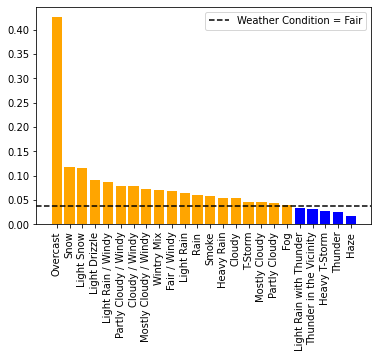

In [14]:
plt.bar(df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]]["Heavy"],color="orange")
plt.bar(df_graph[df_graph["Heavy"]<df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]<df_graph.loc['Fair'][1]]["Heavy"],color="blue")
plt.xticks(rotation=90)
plt.axhline(y=df_graph.loc["Fair"][1],color ="Black",linestyle = "--",label="Weather Condition = Fair")
plt.legend()

In [15]:
facility = ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']
for i in facility:
       print(i)
       print(weatherandseverity[(weatherandseverity["Weather_Condition"] == "Overcast") &( weatherandseverity["Severity"] > 3)][i].value_counts())

Amenity
False    310
True       5
Name: Amenity, dtype: int64
Bump
False    315
Name: Bump, dtype: int64
Crossing
False    291
True      24
Name: Crossing, dtype: int64
Give_Way
False    315
Name: Give_Way, dtype: int64
Junction
False    312
True       3
Name: Junction, dtype: int64
No_Exit
False    314
True       1
Name: No_Exit, dtype: int64
Railway
False    313
True       2
Name: Railway, dtype: int64
Roundabout
False    315
Name: Roundabout, dtype: int64
Station
False    309
True       6
Name: Station, dtype: int64
Stop
False    302
True      13
Name: Stop, dtype: int64
Traffic_Calming
False    315
Name: Traffic_Calming, dtype: int64
Traffic_Signal
False    275
True      40
Name: Traffic_Signal, dtype: int64
Turning_Loop
False    315
Name: Turning_Loop, dtype: int64


In [16]:
"""facility = ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']
for i in facility:
       print(i)
       print(weatherandseverity[weatherandseverity["Weather_Condition"] == "Overcast"][i].value_counts())
"""

'facility = [\'Amenity\',\n       \'Bump\', \'Crossing\', \'Give_Way\', \'Junction\', \'No_Exit\', \'Railway\',\n       \'Roundabout\', \'Station\', \'Stop\', \'Traffic_Calming\', \'Traffic_Signal\',\n       \'Turning_Loop\']\nfor i in facility:\n       print(i)\n       print(weatherandseverity[weatherandseverity["Weather_Condition"] == "Overcast"][i].value_counts())\n'

Crosing & Traffic signal 

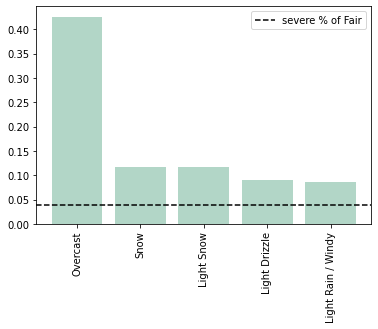

In [17]:
plt.bar(df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]].index[:5],df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]]["Heavy"].head(),color="#b2d6c7")
plt.xticks(rotation=90)
plt.axhline(y=df_graph.loc["Fair"][1],color ="Black",linestyle = "--",label="severe % of Fair")
plt.legend()

In [18]:
weatherandseverity.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.45112,-85.15048,40.35429,-85.14993,6.690,Closed between IN-26 and IN-67 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.35429,-85.14993,40.45112,-85.15048,6.690,Closed between IN-67 and IN-26 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,Closed between Willshire and US-33/Rockford Rd...,...,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143,41.84149,-80.11099,0.824,Between Irish Rd and Blystone Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,At I-490/Exit 161 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [19]:
cond_TT = (weatherandseverity["Traffic_Signal"] == True)&(weatherandseverity["Crossing"]==True)
cond_TF = (weatherandseverity["Traffic_Signal"] == True)&(weatherandseverity["Crossing"]==False)
cond_FT = (weatherandseverity["Traffic_Signal"] == False)&(weatherandseverity["Crossing"]==True)

w_cond = weatherandseverity["Weather_Condition"] == "Overcast"
for i in range(1,5):
    a_1 = len(weatherandseverity[w_cond&cond_TT&(weatherandseverity["Severity"]==i)])
    a_2 = len(weatherandseverity[w_cond&cond_TF&(weatherandseverity["Severity"]==i)])
    a_3 = len(weatherandseverity[w_cond&cond_FT&(weatherandseverity["Severity"]==i)])
    b = len(weatherandseverity[w_cond])
    print(i)
    print("TT =",round(a_1/b,4))
    print("TF =",round(a_2/b,4))
    print("FT =",round(a_3/b,4))

1
TT = 0.0
TF = 0.0
FT = 0.0
2
TT = 0.0293
TF = 0.04
FT = 0.0195
3
TT = 0.0088
TF = 0.0244
FT = 0.0088
4
TT = 0.0166
TF = 0.0224
FT = 0.0068


In [20]:
w = ['Overcast', 'Snow', 'Light Snow', 'Light Drizzle', 'Light Rain / Windy',
       'Partly Cloudy / Windy', 'Cloudy / Windy', 'Mostly Cloudy / Windy',
       'Wintry Mix', 'Fair / Windy', 'Light Rain', 'Rain', 'Smoke',
       'Heavy Rain', 'Cloudy', 'T-Storm', 'Mostly Cloudy', 'Partly Cloudy',
       'Fog', 'Fair', 'Light Rain with Thunder', 'Thunder in the Vicinity',
       'Heavy T-Storm', 'Thunder', 'Haze']
w_per = []
for i in w:
    a_1 = len(weatherandseverity[(weatherandseverity["Weather_Condition"] == i)&cond_TT&(weatherandseverity["Severity"]>=3)])
    b = len(weatherandseverity[weatherandseverity["Weather_Condition"] == i])
    TT_per = round(a_1/b,4)
    w_per.append(TT_per)

/var/folders/1m/f637fb_s0hxb32hgmsjjq_hc0000gn/T/ipykernel_34566/3148833045.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(w,rotation=90)


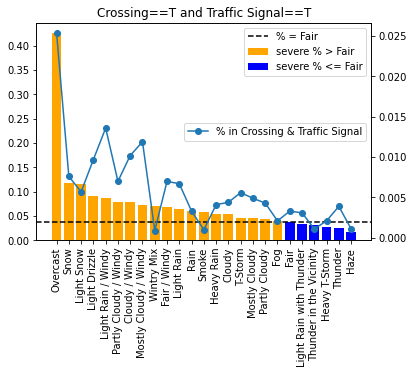

In [21]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax2.plot(w,w_per,marker="o",label="% in Crossing & Traffic Signal")
ax1.bar(df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]]["Heavy"],color="orange",label="severe % > Fair")
ax1.bar(df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]]["Heavy"],color="blue",label="severe % <= Fair")
ax1.axhline(y=df_graph.loc["Fair"][1],color ="Black",linestyle = "--",label="% = Fair")
ax1.set_xticklabels(w,rotation=90)
ax1.legend(loc = "upper right")
ax2.legend(loc = "center right")
plt.title("Crossing==T and Traffic Signal==T")

plt.show()

In [22]:
cond_or = (weatherandseverity["Traffic_Signal"] == True)|(weatherandseverity["Crossing"]==True)

w_or_per = []
for i in w:
    a_1 = len(weatherandseverity[(weatherandseverity["Weather_Condition"] == i)&cond_or&(weatherandseverity["Severity"]>=3)])
    b = len(weatherandseverity[weatherandseverity["Weather_Condition"] == i])
    or_per = round(a_1/b,4)
    w_or_per.append(or_per)

/var/folders/1m/f637fb_s0hxb32hgmsjjq_hc0000gn/T/ipykernel_34566/100005798.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(w,rotation=90)


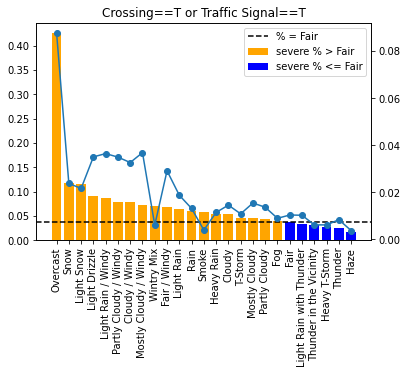

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(w,w_or_per,marker="o",label="% in Crossing or Traffic Signal")
ax1.bar(df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]]["Heavy"],color="orange",label="severe % > Fair")
ax1.bar(df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]]["Heavy"],color="blue",label="severe % <= Fair")
ax1.axhline(y=df_graph.loc["Fair"][1],color ="Black",linestyle = "--",label="% = Fair")
ax1.set_xticklabels(w,rotation=90)
ax1.legend(loc = "upper right")
plt.title("Crossing==T or Traffic Signal==T")

plt.show()

/var/folders/1m/f637fb_s0hxb32hgmsjjq_hc0000gn/T/ipykernel_34566/2203440816.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(w,rotation=90)


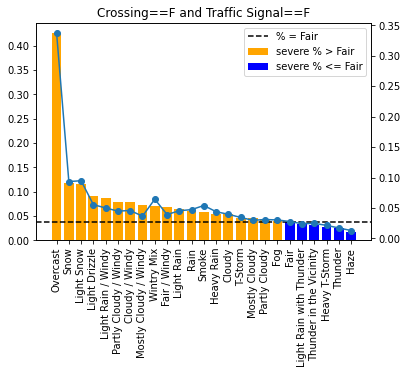

In [24]:
cond_not = (weatherandseverity["Traffic_Signal"] == False)&(weatherandseverity["Crossing"]==False)

w_not_per = []
for i in w:
    a_1 = len(weatherandseverity[(weatherandseverity["Weather_Condition"] == i)&cond_not&(weatherandseverity["Severity"]>=3)])
    b = len(weatherandseverity[weatherandseverity["Weather_Condition"] == i])
    or_per = round(a_1/b,4)
    w_not_per.append(or_per)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(w,w_not_per,marker="o",label="% in not Crossing and not Traffic Signal")
ax1.bar(df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]>df_graph.loc['Fair'][1]]["Heavy"],color="orange",label="severe % > Fair")
ax1.bar(df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]].index,df_graph[df_graph["Heavy"]<=df_graph.loc['Fair'][1]]["Heavy"],color="blue",label="severe % <= Fair")
ax1.axhline(y=df_graph.loc["Fair"][1],color ="Black",linestyle = "--",label="% = Fair")
ax1.set_xticklabels(w,rotation=90)
ax1.legend(loc = "upper right")
plt.title("Crossing==F and Traffic Signal==F")

plt.show()

In [25]:
weatherandseverity[(weatherandseverity["Weather_Condition"]== "Fair") & (weatherandseverity["Crossing"]==False) & (weatherandseverity["Traffic_Signal"]==False)]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3092,A-3093,2,2016-05-09 13:07:53,2016-05-09 19:07:53,35.527180,-121.044820,35.551340,-121.071630,2.249,At Ardath Dr - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5864,A-5865,2,2016-04-01 10:08:54,2016-04-01 16:08:54,33.880116,-116.991175,33.883945,-116.990732,0.266,At I-10/San Bernardino Fwy - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
6166,A-6167,2,2016-04-06 15:50:56,2016-04-06 21:50:56,33.933499,-117.000073,33.933770,-117.032660,1.868,At Jack Rabbit Trl - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
6582,A-6583,4,2016-04-13 15:39:08,2016-04-13 21:39:08,34.436780,-118.372328,34.432644,-118.383992,0.724,Closed at CA-14/Antelope Valley Fwy - Road clo...,...,False,False,False,False,False,False,Day,Day,Day,Day
6584,A-6585,4,2016-04-13 15:39:08,2016-04-13 21:39:08,34.432644,-118.383992,34.436780,-118.372328,0.724,Closed at Santiago Rd - Road closed due to acc...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845289,A-2845290,2,2019-08-23 14:44:22,2019-08-23 15:11:51,37.573253,-122.340625,37.573813,-122.341380,0.057,At Warren Rd - Accident. Lane blocked.,...,False,True,False,False,False,False,Day,Day,Day,Day
2845290,A-2845291,2,2019-08-23 10:14:30,2019-08-27 10:14:14,38.443260,-120.536017,38.475260,-120.525650,2.281,Between Buckhorn Ridge Rd and Inspiration Dr W...,...,False,False,True,False,False,False,Day,Day,Day,Day
2845291,A-2845292,2,2019-08-23 10:14:30,2019-08-27 10:14:14,38.475260,-120.525650,38.443260,-120.536017,2.281,Between Inspiration Dr W and Buckhorn Ridge Rd...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845298,A-2845299,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,At Fassler Ave/Rockaway Beach Ave - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [26]:
list_without_c_ts = []
for i in weather_c:
    list_without_c_ts.append(weatherandseverity[(weatherandseverity["Weather_Condition"]== i) & (weatherandseverity["Crossing"]==False) & (weatherandseverity["Traffic_Signal"]==False)]["Severity"].value_counts(sort=False))

In [27]:
df_without_candts = pd.DataFrame(list_without_c_ts,index=weather_c)
df_without_candts.fillna(0,inplace=True)

In [28]:
total = []
for i in df_without_candts.index:
    n = 0
    n = df_without_candts.loc[i][1]+df_without_candts.loc[i][2]+df_without_candts.loc[i][3]+df_without_candts.loc[i][4]
    total.append(n)

df_without_candts["Total"] = total
df_without_candts

,1,2,3,4,Total
Fair,1447.0,357733.0,2611.0,10317.0,372108.0
Cloudy,494.0,106032.0,1325.0,4220.0,112071.0
Mostly Cloudy,717.0,88960.0,1141.0,2530.0,93348.0
Partly Cloudy,347.0,62302.0,691.0,1948.0,65288.0
Light Rain,163.0,28952.0,518.0,1272.0,30905.0
...,...,...,...,...,...
Thunderstorms and Rain,0.0,0.0,1.0,0.0,1.0
Thunder and Hail,0.0,1.0,0.0,0.0,1.0
Sand / Dust Whirlwinds / Windy,0.0,1.0,0.0,0.0,1.0
Heavy Sleet,0.0,0.0,0.0,0.0,0.0


In [29]:
df_without_candts.index

Index(['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain', 'Fog',
       'Haze', 'Light Snow', 'Rain', 'Fair / Windy', 'Thunder in the Vicinity',
       'Thunder', 'Smoke', 'Cloudy / Windy', 'Heavy Rain', 'T-Storm',
       'Mostly Cloudy / Windy', 'Light Rain with Thunder', 'Light Drizzle',
       'Heavy T-Storm', 'Partly Cloudy / Windy', 'Light Rain / Windy', 'Snow',
       'Wintry Mix', 'Overcast', 'Light Snow / Windy', 'Drizzle', 'Heavy Snow',
       'Rain / Windy', 'Patches of Fog', 'Shallow Fog', 'N/A Precipitation',
       'Mist', 'Haze / Windy', 'Heavy Rain / Windy', 'Heavy T-Storm / Windy',
       'Light Freezing Rain', 'Snow / Windy', 'Thunder / Windy',
       'T-Storm / Windy', 'Showers in the Vicinity', 'Fog / Windy',
       'Light Freezing Drizzle', 'Clear', 'Heavy Snow / Windy',
       'Light Drizzle / Windy', 'Drizzle and Fog', 'Heavy Drizzle',
       'Light Rain Shower', 'Blowing Dust / Windy', 'Blowing Dust',
       'Scattered Clouds', 'Smoke / Windy', 'Li

In [30]:
p_w = []
num = df_without_candts[df_without_candts["Total"]>800].shape[0]
for i in df_without_candts[df_without_candts["Total"]>800].index[:num]:
    n1 = (df_without_candts.loc[i][1]+df_without_candts.loc[i][2])/df_without_candts.loc[i]["Total"]
    n2 = (df_without_candts.loc[i][3]+df_without_candts.loc[i][4])/df_without_candts.loc[i]["Total"]
    p_w.append([round(n1,4),round(n2,4)])

df_graph_without = pd.DataFrame(p_w,index=weather_c[:num],columns=['Light','Heavy'])
df_graph_without.sort_values("Heavy",ascending=False,inplace=True)

In [110]:
df_graph_without.shape

(25, 2)

In [90]:
df_graph_without.iloc[0][1]

0.41

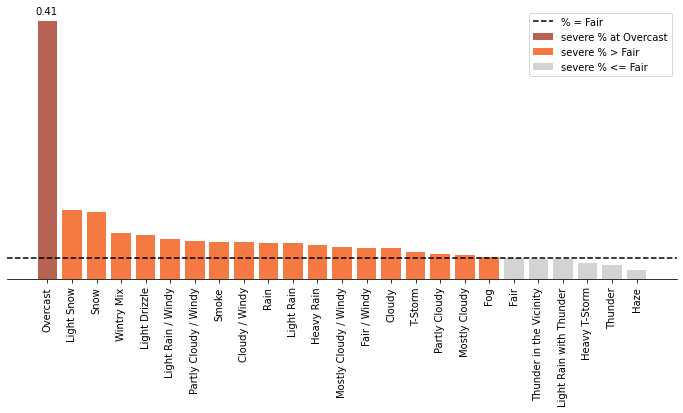

In [137]:
fig, ax = plt.subplots()
ax.bar(df_graph_without[df_graph_without["Heavy"]>df_graph_without.loc['Fair'][1]].index[0:1] , df_graph_without[df_graph_without["Heavy"]>df_graph_without.loc['Fair'][1]]["Heavy"].values[0:1],color="#B66353",label="severe % at Overcast")
ax.bar(df_graph_without[df_graph_without["Heavy"]>df_graph_without.loc['Fair'][1]].index[1:] , df_graph_without[df_graph_without["Heavy"]>df_graph_without.loc['Fair'][1]]["Heavy"].values[1:],color="#F57943",label="severe % > Fair")
ax.bar(df_graph_without[df_graph_without["Heavy"]<=df_graph_without.loc['Fair'][1]].index , df_graph_without[df_graph_without["Heavy"]<=df_graph_without.loc['Fair'][1]]["Heavy"],color="#d3d3d3",label="severe % <= Fair")
ax.axhline(y=df_graph_without.loc["Fair"][1],color ="Black",linestyle = "--",label="% = Fair")
plt.xticks(rotation=90)
fig.set_size_inches(12,5)
ax.legend(loc = "upper right")
#plt.title("percentage of severe accidents by weather condition")
ax.annotate(df_graph_without.iloc[0][1],xy=(-0.5,0.42))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.show()

In [123]:
weatherandseverity["Weather_Condition"].value_counts().values[0]

466076

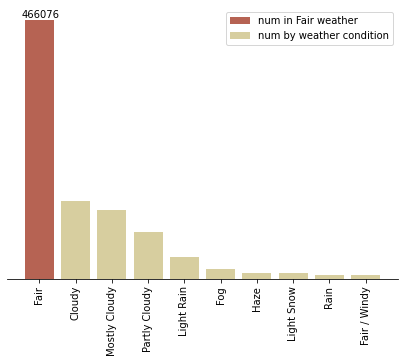

In [133]:
fig, ax = plt.subplots()
ax.bar(weatherandseverity["Weather_Condition"].value_counts().index[0:1],weatherandseverity["Weather_Condition"].value_counts().values[0:1],color="#B66353",label="num in Fair weather")
ax.bar(weatherandseverity["Weather_Condition"].value_counts().index[1:10],weatherandseverity["Weather_Condition"].value_counts().values[1:10],color="#D7CE9F",label="num by weather condition")

plt.xticks(rotation=90)
fig.set_size_inches(7,5)
ax.legend(loc = "upper right")
ax.annotate(weatherandseverity["Weather_Condition"].value_counts().values[0],xy=(-0.5,469100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.show()

In [134]:
df_graph_without

,Light,Heavy
Overcast,0.5900,0.4100
Light Snow,0.8904,0.1096
Snow,0.8926,0.1074
Wintry Mix,0.9259,0.0741
Light Drizzle,0.9289,0.0711
Light Rain / Windy,0.9360,0.0640
Partly Cloudy / Windy,0.9384,0.0616
Smoke,0.9402,0.0598
Cloudy / Windy,0.9408,0.0592
Rain,0.9418,0.0582
